In [204]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist

%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

In [205]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

nfiles = {}
nfiles['2016'] = 4 #43
nfiles['2017'] = 4 #43
nfiles['2018'] = 51

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [206]:
year = '2016'
years = [year]

In [207]:
outsum = processor.dict_accumulator()

for y in ['2016']: 
    for n in range(1,nfiles[year]+1):
        out = util.load('condor/outfiles/'+y+'_'+str(n)+'.coffea')
        outsum.add(out)
        
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
outsum['templates2'].scale(scale_lumi, 'dataset')
outsum['templates3'].scale(scale_lumi, 'dataset')

In [208]:
templates2 = outsum['templates2'].group('dataset', hist.Cat('process', 'Process'), pmap)
templates3 = outsum['templates3'].group('dataset', hist.Cat('process', 'Process'), pmap)

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7feb9bb7c438>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7feb9b6f8198>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


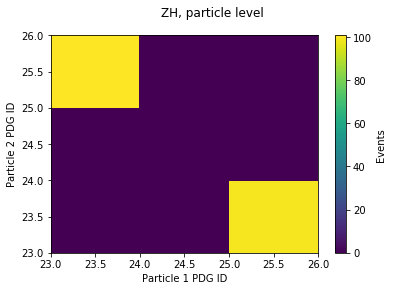

In [209]:
tempZH = templates3.integrate('region', 'noselection').integrate('process','ZH')
hist.plot2d(tempZH.sum('deltaR','pt1','pt2'),xaxis='particle1')
plt.suptitle('ZH, particle level')
plt.savefig('plots/'+year+'/ZH_pdgid_2d.png',bbox='tight')

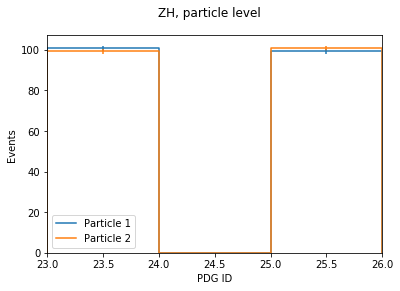

In [210]:
hist.plot1d(tempZH.sum('deltaR','pt1','pt2','particle2'))
hist.plot1d(tempZH.sum('deltaR','pt1','pt2','particle1'))
plt.legend(['Particle 1','Particle 2'])
plt.suptitle('ZH, particle level')
plt.xlabel('PDG ID')
plt.savefig('plots/'+year+'/ZH_pdgid_1d.png',bbox='tight')

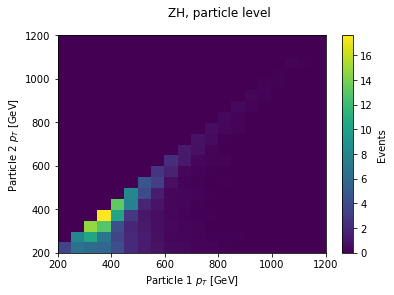

In [211]:
hist.plot2d(tempZH.sum('deltaR','particle1','particle2'),xaxis='pt1')
plt.suptitle('ZH, particle level')
plt.savefig('plots/'+year+'/ZH_particlept_2d.png',bbox='tight')

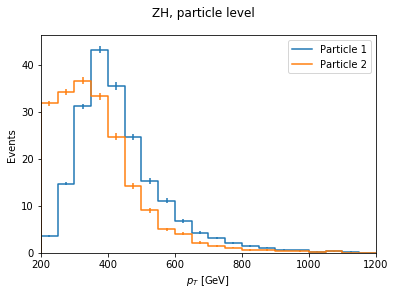

In [212]:
hist.plot1d(tempZH.sum('deltaR','particle1','particle2','pt2'))
hist.plot1d(tempZH.sum('deltaR','particle1','particle2','pt1'))
plt.legend(['Particle 1','Particle 2'])
plt.suptitle('ZH, particle level')
plt.xlabel('$p_T$ [GeV]')
plt.savefig('plots/'+year+'/ZH_particlept_1d.png',bbox='tight')

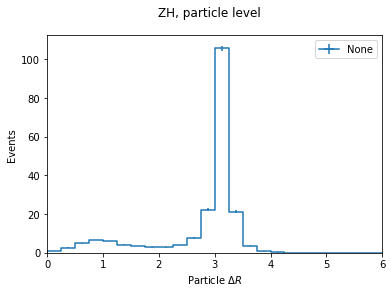

In [213]:
hist.plot1d(tempZH.sum('particle1','particle2','pt1','pt2'))
plt.suptitle('ZH, particle level')
plt.savefig('plots/'+year+'/ZH_particleDR_1d.png',bbox='tight')

KeyError: ()

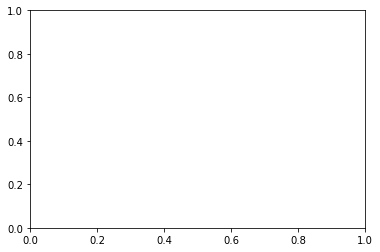

In [214]:
tempWH = templates3.integrate('region', 'noselection').integrate('process','WH')
hist.plot2d(tempWH.sum('deltaR','pt1','pt2'),xaxis='particle1')
plt.suptitle('WH, particle level')
plt.savefig('plots/'+year+'/WH_pdgid_2d.png',bbox='tight')

In [ ]:
hist.plot1d(tempWH.sum('deltaR','pt1','pt2','particle2'))
hist.plot1d(tempWH.sum('deltaR','pt1','pt2','particle1'))
plt.legend(['Particle 1','Particle 2'])
plt.suptitle('WH, particle level')
plt.xlabel('PDG ID')
plt.savefig('plots/'+year+'/WH_pdgid_1d.png',bbox='tight')

In [ ]:
hist.plot2d(tempWH.sum('deltaR','particle1','particle2'),xaxis='pt1')
plt.suptitle('WH, particle level')
plt.savefig('plots/'+year+'WH_particlept_2d.png',bbox='tight')

In [ ]:
hist.plot1d(tempWH.sum('deltaR','particle1','particle2','pt2'))
hist.plot1d(tempWH.sum('deltaR','particle1','particle2','pt1'))
plt.legend(['Particle 1','Particle 2'])
plt.suptitle('WH, particle level')
plt.xlabel('$p_T$ [GeV]')
plt.savefig('plots/'+year+'/WH_particlept_1d.png',bbox='tight')

In [ ]:
hist.plot1d(tempWH.sum('particle1','particle2','pt1','pt2'))
plt.suptitle('WH, particle level')
plt.savefig('plots/'+year+'/WH_particleDR_1d.png',bbox='tight')

In [ ]:
tempVH = tempWH + tempZH
hist.plot2d(tempVH.sum('deltaR','pt1','pt2'),xaxis='particle1')
plt.suptitle('WH + ZH, particle level')
plt.savefig('plots/'+year+'/VH_pdgid_2d.png',bbox='tight')

In [ ]:
hist.plot1d(tempVH.sum('deltaR','pt1','pt2','particle2'))
hist.plot1d(tempVH.sum('deltaR','pt1','pt2','particle1'))
plt.legend(['Particle 1','Particle 2'])
plt.suptitle('WH, particle level')
plt.xlabel('PDG ID')
plt.savefig('plots/'+year+'/VH_pdgid_1d.png',bbox='tight')

In [ ]:
hist.plot2d(tempVH.sum('deltaR','particle1','particle2'),xaxis='pt1')
plt.suptitle('WH + ZH, particle level')
plt.savefig('plots/'+year+'/VH_particlept_2d.png',bbox='tight')

In [ ]:
hist.plot1d(tempVH.sum('deltaR','particle1','particle2','pt2'))
hist.plot1d(tempVH.sum('deltaR','particle1','particle2','pt1'))
plt.legend(['Particle 1','Particle 2'])
plt.suptitle('WH + ZH, particle level')
plt.xlabel('$p_T$ [GeV]')
plt.savefig('plots/'+year+'/VH_particlept_1d.png',bbox='tight')

In [ ]:
hist.plot1d(tempVH.sum('particle1','particle2','pt1','pt2'))
plt.suptitle('WH + ZH, particle level')
plt.savefig('plots/'+year+'/VH_particleDR_1d.png',bbox='tight')

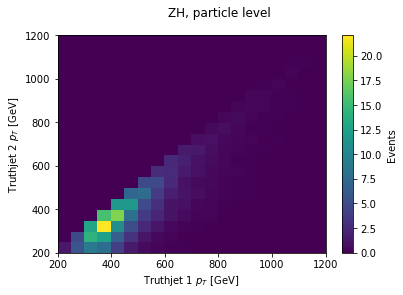

In [215]:
tempZH = templates2.integrate('region', 'noselection').integrate('process','ZH')
hist.plot2d(tempZH.sum('deltaR'),xaxis='pt1')
plt.suptitle('ZH, particle level')
plt.savefig('plots/'+year+'/ZH_truthjetpt_2d.png',bbox='tight')

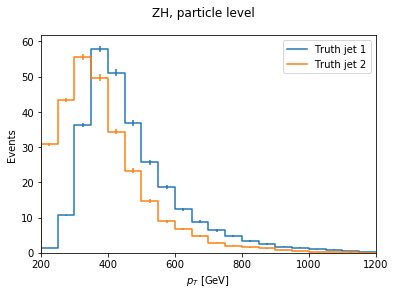

In [216]:
hist.plot1d(tempZH.sum('deltaR','pt2'))
hist.plot1d(tempZH.sum('deltaR','pt1'))
plt.legend(['Truth jet 1','Truth jet 2'])
plt.suptitle('ZH, particle level')
plt.xlabel('$p_T$ [GeV]')
plt.savefig('plots/'+year+'/ZH_truthjetpt_1d.png',bbox='tight')

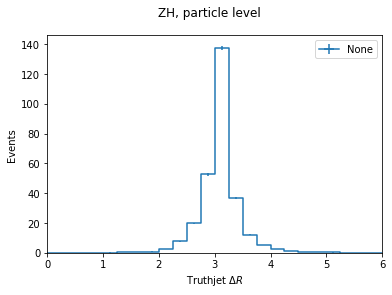

In [217]:
hist.plot1d(tempZH.sum('pt1','pt2'))
plt.suptitle('ZH, particle level')
plt.savefig('plots/'+year+'/ZH_truthjetDR_2d.png',bbox='tight')

KeyError: ()

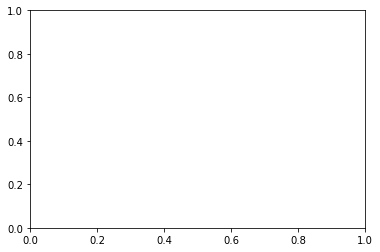

In [221]:
tempWH = templates2.integrate('region', 'noselection').integrate('process','WH')
hist.plot2d(tempWH.sum('deltaR'),xaxis='pt1')
plt.suptitle('WH, particle level')
plt.savefig('plots/'+year+'/WH_truthjetpt_2d.png',bbox='tight')

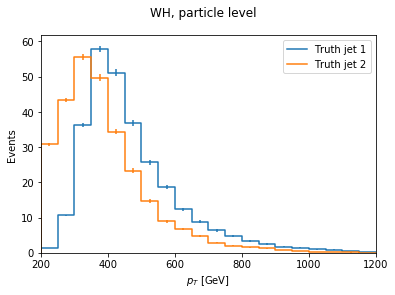

In [219]:
hist.plot1d(tempWH.sum('deltaR','pt2'))
hist.plot1d(tempWH.sum('deltaR','pt1'))
plt.legend(['Truth jet 1','Truth jet 2'])
plt.suptitle('WH, particle level')
plt.xlabel('$p_T$ [GeV]')
plt.savefig('plots/'+year+'/WH_truthjetpt_1d.png',bbox='tight')

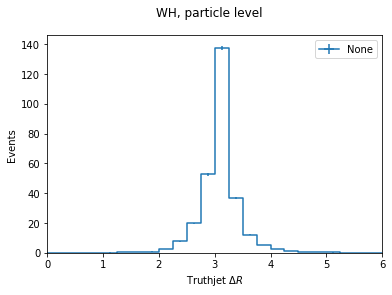

In [220]:
hist.plot1d(tempWH.sum('pt1','pt2'))
plt.suptitle('WH, particle level')
plt.savefig('plots/'+year+'/WH_truthjetDR_2d.png',bbox='tight')

In [ ]:
tempVH = tempWH + tempZH
hist.plot2d(tempVH.sum('deltaR'),xaxis='pt1')
plt.suptitle('WH + ZH, particle level')
plt.savefig('plots/'+year+'/VH_truthjetpt_2d.png',bbox='tight')

In [ ]:
hist.plot1d(tempVH.sum('deltaR','pt2'))
hist.plot1d(tempVH.sum('deltaR','pt1'))
plt.legend(['Truth jet 1','Truth jet 2'])
plt.suptitle('WH + ZH, particle level')
plt.xlabel('$p_T$ [GeV]')
plt.savefig('plots/'+year+'/VH_truthjetpt_1d.png',bbox='tight')

In [ ]:
hist.plot1d(tempVH.sum('pt1','pt2'))
plt.suptitle('WH + ZH, particle level')
plt.savefig('plots/'+year+'/VH_truthjetDR_2d.png',bbox='tight')